In [2]:
using JLD, HDF5
using PyPlot

In [3]:
include("src/PlotTools.jl")

PlotTools

In [4]:
include("src/CFTutils.jl")
import CFTutils
CFT = CFTutils

CFTutils

In [5]:
include("src/EDutils.jl")
include("src/LatCFT.jl")
import LatCFT
LCFT = LatCFT

LatCFT

In [6]:
cset = [(0.121569,0.466667,0.705882),(0.682353,0.780392,0.909804),(1.0,0.498039,0.054902),(1.0,0.733333,0.470588),(0.172549,0.627451,0.172549),(0.596078,0.87451,0.541176),(0.839216,0.152941,0.156863),(1.0,0.596078,0.588235),(0.580392,0.403922,0.741176),(0.772549,0.690196,0.835294),(0.54902,0.337255,0.294118),(0.768627,0.611765,0.580392),(0.890196,0.466667,0.760784),(0.968627,0.713725,0.823529),(0.498039,0.498039,0.498039),(0.780392,0.780392,0.780392),(0.737255,0.741176,0.133333),(0.858824,0.858824,0.552941),(0.0901961,0.745098,0.811765),(0.619608,0.854902,0.898039)];

In [7]:
pricols = cset[[1,3,5]];

In [8]:
##For TeX rendering of plot text, uncomment this.
#PyPlot.rc("font", family="serif")
#PyPlot.rc("font", size=11)
#PyPlot.rc("text", usetex=true)
#rc("text.latex", preamble="\\usepackage\{lmodern\}")

# ANNNI model demo

## Load data
To regenerate the data, run the "ED" script (this may require more memory than the average desktop computer has).

In [9]:
datapath = "data/";

In [10]:
ed_data = load("$(datapath)ANNNI3_redP_LCFTdata.jld", "ev");

In [11]:
Hs_data = load("$(datapath)ANNNI3_redP_LCFTdata.jld", "Hs");

In [12]:
norm_facs = LCFT.normalising_factors(ed_data, Hs_data)

Dict{Int64,Float64} with 17 entries:
  16 => 0.504675
  11 => 0.361195
  21 => 0.652495
  7  => 0.256781
  9  => 0.306839
  10 => 0.333656
  19 => 0.593078
  17 => 0.534022
  8  => 0.281047
  22 => 0.682306
  6  => 0.234877
  20 => 0.622748
  13 => 0.417718
  14 => 0.446481
  15 => 0.475483
  12 => 0.389259
  18 => 0.563497

## Action of H2 on $I$
Corrections visible.

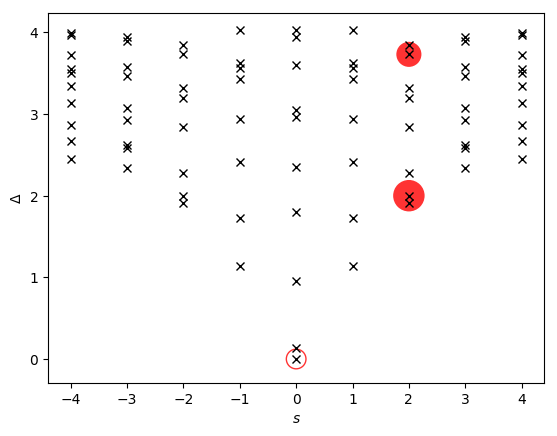

In [13]:
let N = 12, ev_num = 1
    H1,H2 = Hs_data[N][1:2]
    ols = LCFT.plot_spec(ev_num, N, ed_data[N], H2, norm_fac=norm_facs[N], mom_res=1)
    ols[abs(ols) .> 1e-13]
end;

## Normalization

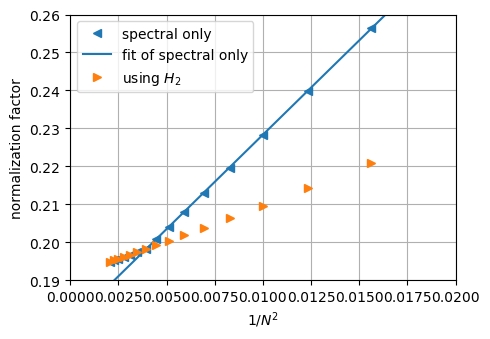

Ns[fitfirstn_zeta:fitlastn_zeta] = [8,9,10,11,12,13,14,15]
a = 0.17861286052399666


In [27]:
let Ns = sort(collect(keys(ed_data))), fitfirstn_zeta = 3, fitlastn_zeta = 10
    figure(figsize=(5,3.5))
    
    #Compute normalization factors using lowest-energy p=±2 states
    E0s = [ed_data[N][1][1] for N in Ns]
    inds = Dict((N, findfirst(p->abs(p-2.0) < 1e-10, LCFT.moms_Tev(ed_data[N][2], N, 1))) for N in Ns)
    Ep2s = [ed_data[N][1][inds[N]] for N in Ns]
    nfs = 2π * 2./(Ep2s - E0s) ./ Ns
    
    #Normalization factors from T states
    nfsT = [2π * norm_facs[N] / N for N in Ns]
    
    xs = 1./Ns.^2
    plot(xs, nfs, "<", label="spectral only", color=cset[1])
    xlabel(L"1/N^2")
    ylabel("normalization factor")
    xlim((0.0,0.02))
    ylim((0.19,0.26))
    
    @show Ns[fitfirstn_zeta:fitlastn_zeta]
    #Extrapolate a normalization factor (not used in the following)
    a, b = linreg(xs[fitfirstn_zeta:fitlastn_zeta], nfs[fitfirstn_zeta:fitlastn_zeta])
    fitxs = [0.0, 0.02]
    plot(fitxs, a + b * fitxs, "-", label="fit of spectral only", color=cset[1])
    @show a
    
    plot(xs, nfsT, ">", label="using \$H_2\$", color=cset[3])
    
    legend()
    grid()
    tight_layout()
    #PlotTools.savepdf_cropped_compfonts("plots/ANNNI_normfacs.pdf")
end

## Central charge from the energy spectrum

a = 0.19115615492527344
ys = [-1.85832,-1.84735,-1.84038,-1.83566,-1.83232,-1.82987,-1.82801,-1.82657,-1.82543,-1.82452,-1.82377,-1.82315,-1.82263,-1.8222,-1.82182,-1.8215,-1.82122]
(a,b) = (-1.8183667232760776,-1.382563405592328)
(a,b) = 

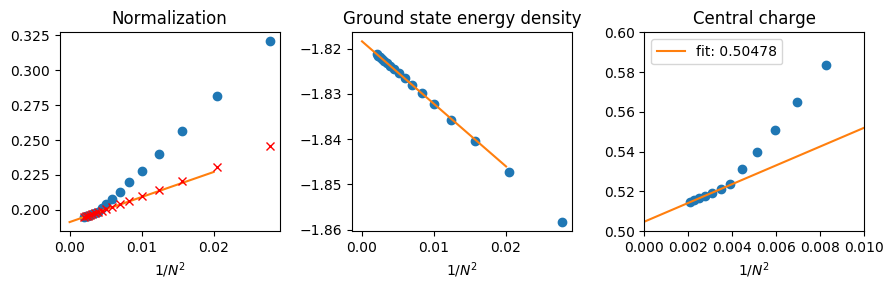

(0.5047793366575324,4.729782523320165)
Ns = [6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22]
cs = [0.880985,0.763109,0.690158,0.641761,0.607978,0.583437,0.565053,0.550937,0.539878,0.531066,0.523946,0.521236,0.519343,0.517797,0.516533,0.515499,0.514656]


In [15]:
cs_en, nf_en = let Ns = sort(collect(keys(norm_facs))), fitlastn_zeta = 4, fitlastn_c = 5, fitlastn_e0 = 5
    figure(figsize=(9,3))
    subplot(131)
    
    #Compute normalization factors using lowest-energy p=±2 states
    E0s = [ed_data[n][1][1] for n in Ns]
    inds = Dict((n, findfirst(p->abs(p-2.0) < 1e-10, angle(ed_data[n][2])/2π * n)) for n in Ns)
    Ep2s = [ed_data[n][1][inds[n]] for n in Ns]
    nfs_mod = 2./(Ep2s - E0s)
    norm_facs_en = Dict{Int, Float64}((Ns[j], nfs_mod[j]) for j in 1:length(Ns))
    nfs = 2π * nfs_mod ./ Ns
    
    #Normalization factors from T states
    nfsT = [2π * norm_facs[N] / N for N in Ns]
    
    xs = 1./Ns.^2
    title("Normalization")
    plot(xs, nfs, "o")
    xlabel(L"1/N^2")
    #xlim((0.0,0.021))
    #ylim((0.498,0.532))
    
    #Extrapolate a normalization factor (not used in the following)
    a, b = linreg(xs[end-fitlastn_zeta:end], nfs[end-fitlastn_zeta:end])
    fitxs = [0.0, 0.02]
    plot(fitxs, a + b * fitxs, "-")
    @show a
    plot(xs, nfsT, "rx")
    
    #Extrapolate the ground-state energy density e0
    subplot(132)
    title("Ground state energy density")
    xs = 1./Ns.^2
    e0s = [ed_data[N][1][1] for N in Ns]
    ys = (e0s ./ Ns)
    @show ys
    plot(xs, ys, "o")
    xlabel(L"1/N^2")
    a, b = linreg(xs[end-fitlastn_e0:end], ys[end-fitlastn_e0:end])
    plot(fitxs, a + b * fitxs, "-")
    @show a, b
    e0 = a
    
    #Subracting N*e0, extrapolate an estimate for c!
    subplot(133)
    title("Central charge")
    cs = -6/π * (e0s./Ns - e0) .* Ns.^2 .* nfs
    plot(xs, cs, "o")
    xlabel(L"1/N^2")
    a, b = linreg(xs[end-fitlastn_c:end], cs[end-fitlastn_c:end])
    fitxs = [0.0, 0.02]
    astr = @sprintf "%.5f" real(a)
    plot(fitxs, a + b * fitxs, "-", label="fit: $astr")
    @show a, b
    legend()
    xlim(0.00,0.01)
    ylim(0.5,0.6)

    tight_layout()

    @show Ns
    @show cs
    cs, norm_facs_en
end;

## Central charge comparison

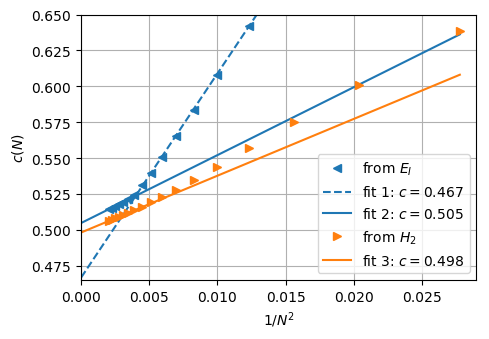

ns[fitn] = [17,18,19,20,21,22]


In [28]:
let ns = sort(collect(6:1:22)), Npow = 2
    cs_filt = [real(LCFT.estimate_c_filterT(Hs_data[n])) for n in ns]
    
    fitn = length(cs_filt)-5:length(cs_filt)
    a1, b1 = linreg(1 ./ ns[fitn].^Npow, cs_filt[fitn])
    @show ns[fitn]
    
    figure(figsize=(5,3.5))
    
    xs = 1 ./ ns.^Npow
    xs_fit = [0.0, maximum(xs)]

    plot(xs, cs_en, "<", label="from \$E_I\$", color=cset[1])
    
    a2, b2 = linreg(1 ./ ns[3:10].^Npow, cs_en[3:10])
    a2str = @sprintf "%.3f" real(a2)
    plot(xs_fit, a2 + b2 * xs_fit, "--", label="fit 1: \$c=$(a2str)\$", color=cset[1])
    
    a2, b2 = linreg(1 ./ ns[fitn].^Npow, cs_en[fitn])
    a2str = @sprintf "%.3f" real(a2)
    plot(xs_fit, a2 + b2 * xs_fit, "-", label="fit 2: \$c=$(a2str)\$", color=cset[1])
    
    plot(xs, cs_filt, ">C1", label="from \$H_2\$")
    a1str = @sprintf "%.3f" real(a1)
    plot(xs_fit, a1 + b1 * xs_fit, "-", label="fit 3: \$c=$(a1str)\$", color=cset[3])
    
    xlim((0.0, 0.029))
    ylim((0.465, 0.65))
    xlabel("\$1/N^{$(Npow)}\$")
    ylabel(L"c(N)") #, fontsize=13)
    legend()
    grid()
    
    tight_layout()
    #PlotTools.savepdf_cropped("plots/ANNNI_c.pdf", dpi=300)
end

## Corrections to $H_1$ on primary states

### Identity tower

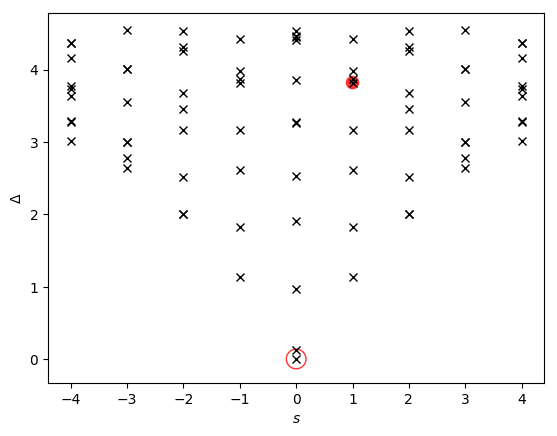

2-element Array{Complex{Float64},1}:
 -1.49067e-13-3.14329e-14im        
            -0.0203928+0.00384107im

In [17]:
let N = 16, ev_num = 1
    H1,H2 = Hs_data[N][1:2]
    ols = LCFT.plot_spec(ev_num, N, ed_data[N], H1, norm_fac=norm_facs[N], mom_res=1)
    ols[abs(ols) .> 1e-13]
end

### Sigma tower

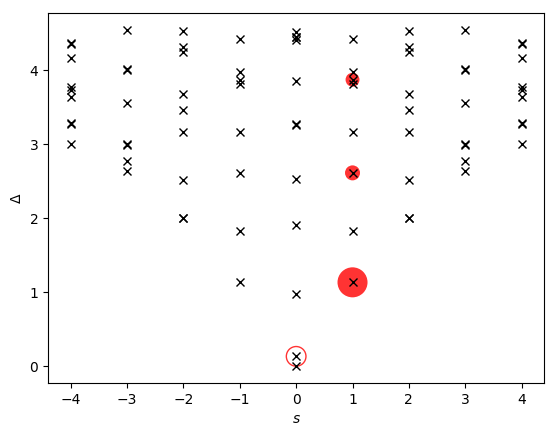

5-element Array{Complex{Float64},1}:
             0.346444+0.103472im  
 -2.89365e-13-5.9113e-13im        
           0.00548164-0.0238584im 
           -0.0193055-0.00957244im
           0.00656696-0.00556047im

In [18]:
let N = 16, ev_num = 2
    H1,H2 = Hs_data[N][1:2]
    ols = LCFT.plot_spec(ev_num, N, ed_data[N], H1, norm_fac=norm_facs[N], mom_res=1)
    ols[abs(ols) .> 1e-13]
end

### Epsilon tower

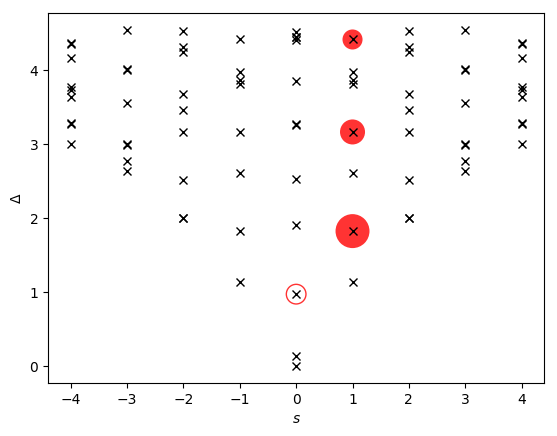

3-element Array{Complex{Float64},1}:
  0.833439+0.529269im  
 0.0831641-0.0877276im 
 0.0487119-0.00868372im

In [19]:
let N = 16, ev_num = 3
    H1,H2 = Hs_data[N][1:2]
    ols = LCFT.plot_spec(ev_num, N, ed_data[N], H1, norm_fac=norm_facs[N])
    ols[abs(ols) .> 1e-13]
end

Here, we pick out the corrections corresponding to the lowest-energy overlaps that are incorrect

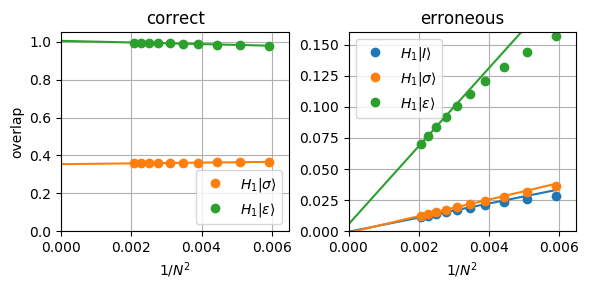

In [20]:
let Ns = collect(13:22)
    figure(figsize=(6,3))
    xs = Ns.^(-2.0)
    
    subplot(121)
    title("correct")
    let evnum = 2
        err = Float64[vecnorm(Hs_data[N][1][1:5,evnum]) for N in Ns]
        plot(xs, err, "o", color=pricols[2], label=L"H_1 |\sigma\rangle")
        a, b = linreg(xs[end-2:end], err[end-2:end])
        fitxs = [0.0, xs[1]]
        plot(fitxs, a + b * fitxs, "-", color=pricols[2])
    end
    let evnum = 3, Ns = collect(13:22)
        err = Float64[vecnorm(Hs_data[N][1][1:11,evnum]) for N in Ns]
        plot(Ns.^(-2.0), err, "o", color=pricols[3], label=L"H_1 |\varepsilon \rangle")
        a, b = linreg(xs[end-2:end], err[end-2:end])
        fitxs = [0.0, xs[1]]
        plot(fitxs, a + b * fitxs, "-", color=pricols[3])
    end
    xlim(0.0,0.0065)
    ylim(0.0,1.05)
    grid()
    legend(loc=4)
    xlabel(L"1/N^2")
    ylabel("overlap")
    
    subplot(122)
    title("erroneous")
    let evnum = 1
        err = Float64[vecnorm(Hs_data[N][1][:,evnum]) for N in Ns]
        plot(xs, err, "o", color=pricols[1], label=L"H_1 |I\rangle")
        a, b = linreg(xs[end-2:end], err[end-2:end])
        fitxs = [0.0, xs[1]]
        plot(fitxs, a + b * fitxs, "-", color=pricols[1])
    end
    let evnum = 2
        err = Float64[vecnorm(Hs_data[N][1][6:20,evnum]) for N in Ns]
        plot(xs, err, "o", color=pricols[2], label=L"H_1 |\sigma\rangle")
        a, b = linreg(xs[end-2:end], err[end-2:end])
        fitxs = [0.0, xs[1]]
        plot(fitxs, a + b * fitxs, "-", color=pricols[2])
    end
    let evnum = 3, Ns = collect(13:22)
        err = Float64[vecnorm(Hs_data[N][1][12:40,evnum]) for N in Ns]
        plot(Ns.^(-2.0), err, "o", color=pricols[3], label=L"H_1 |\varepsilon \rangle")
        a, b = linreg(xs[end-2:end], err[end-2:end])
        fitxs = [0.0, xs[1]]
        plot(fitxs, a + b * fitxs, "-", color=pricols[3])
    end
    xlim(0.0,0.0065)
    ylim(0.0,0.16)
    grid()
    legend()
    xlabel(L"1/N^2")

    tight_layout()
    #PlotTools.savepdf_cropped_compfonts("plots/ANNNI_H1_overlaps.pdf")
end

## Identify eigenstates that are quasiprimary
(some quasiprimary states are not eigenstates, but linear combinations of them)

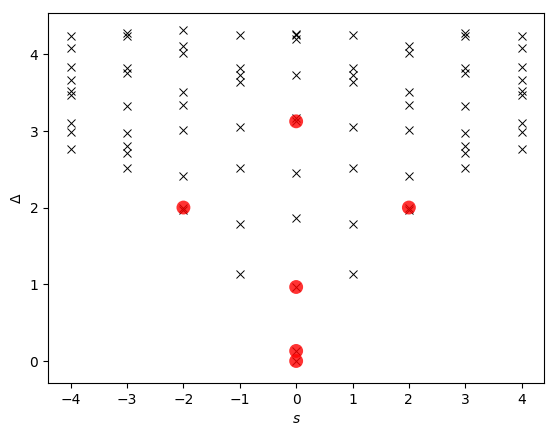

([1,2,3,11,12,36],[0.0,3.18183e-16,1.78046e-15,0.18195,0.18195,0.490416,0.490416,0.245498,0.726977,0.726977  …  1.43156,0.0426602,0.0426602,1.32199,1.32199,1.07801,1.0148,1.43315,1.43315,0.358619])

In [21]:
let N = 14, eps = 1e-2
    LCFT.plot_qps(ed_data[N], Hs_data[N], N, eps, norm_fac=norm_facs[N])
    #savefig("quasiprimaries_e$(eps)_N$(N)_$(modelname).pdf")
end

## Identify eigenstates that are primary

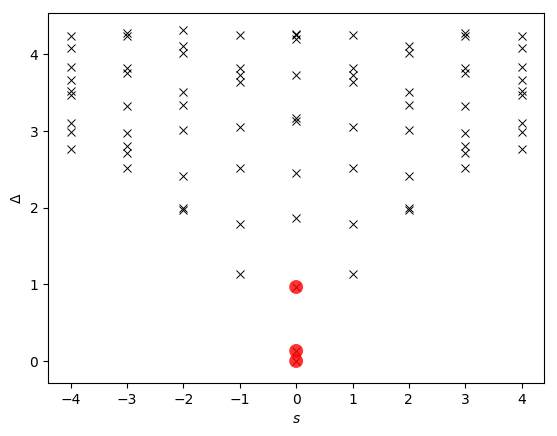

([1,2,3],[0.0,4.94305e-16,2.20012e-15,0.18195,0.210767,0.490416,0.688998,0.245498,1.09053,1.09053  …  2.59284,0.275863,0.275863,2.31015,2.31261,1.77608,1.79012,2.65951,2.65951,1.11083])

In [22]:
let N = 14, eps = 1e-10
    LCFT.plot_ps(ed_data[N], Hs_data[N], N, eps, norm_fac=norm_facs[N], mom_res=1)
    #savefig("primaries_e$(eps)_N$(N)_$(modelname).pdf")
end

## Plot Ising CFT spectrum

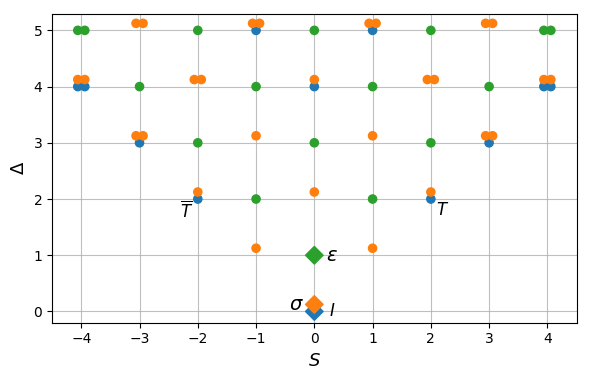

In [29]:
let lblfs = 12
    figure(figsize=(6,3.9))
    grid(alpha=0.8)
    ops = [CFT.ising_cft_eye, CFT.ising_cft_sigma, CFT.ising_cft_epsilon]
    CFT.plot_sops_v3(ops, pricols, 6.5, sz=35, szp=80)
    annotate(L"T", xy=(2.2, 1.8), fontsize=lblfs, va="center", ha="center")
    annotate(L"\overline{T}", xy=(-2.2, 1.8), fontsize=lblfs, va="center", ha="center")
    annotate(L"I", xy=(0.3,0.0), fontsize=lblfs, va="center", ha="center")
    annotate(L"\sigma", xy=(-0.3,1/8), fontsize=14, va="center", ha="center")
    annotate(L"\varepsilon", xy=(0.3,1.0), fontsize=14, va="center", ha="center")
    legend()
    ylim((-0.2, 5.3))
    xlim((-4.5,+4.5))
    xlabel(L"S", fontsize=13)
    ylabel(L"\Delta", fontsize=13)
    xticks(collect(-4:4))
    yticks(collect(0:5))
    tight_layout()
end

## Plot Virasoro towers

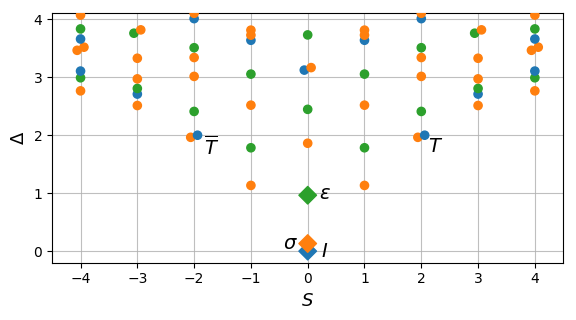

In [24]:
let N = 14, blob_min = 0.01
    figure(figsize=(6,3.3))
    grid(alpha=0.8)
    LCFT.plot_H1H2_towers(ed_data[N], Hs_data[N], norm_facs[N], N,
                      Int[1,2,3], cs=pricols, 
                      pex_yrange=0.06, pex_xspace=0.12, pex_rounddigits=2, sz=35, szp=80)
    annotate(L"T", xy=(2.25, 1.8), fontsize=14, va="center", ha="center")
    annotate(L"\overline{T}", xy=(-1.7, 1.8), fontsize=14, va="center", ha="center")
    annotate(L"I", xy=(0.3,0.0), fontsize=14, va="center", ha="center")
    annotate(L"\sigma", xy=(-0.3,1/8), fontsize=14, va="center", ha="center")
    annotate(L"\varepsilon", xy=(0.3,1.0), fontsize=14, va="center", ha="center")
    xlabel(L"S", fontsize=13)
    ylabel(L"\Delta", fontsize=13)
    ylim((-0.2,4.1))
    xticks(collect(-4:4))
    xlim(-4.5,+4.5)
    #yticks(collect(0:4))
    legend()
    tight_layout()
    #PlotTools.savepdf_cropped("plots/$(modelname)_H1H2_towers_N$(N).pdf")
end

## Plot states with components that are globally descended from selected quasiprimary states

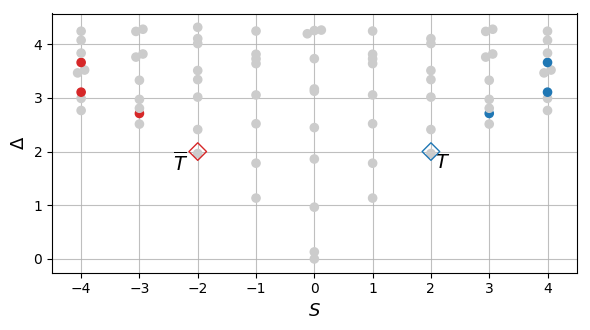

In [25]:
let N = 14, blob_min = 0.01
    figure(figsize=(6,3.4))
    grid(alpha=0.8)
    gry = (0.8,0.8,0.8)
    #Since there are some global-tower-mixing corrections, we need to compute all global towers here.
    #We color the ones we don't want to show in grey.
    LCFT.plot_H1_towers(ed_data[N], Hs_data[N], norm_facs[N], N,
                      [11,12,2,3,36], cs=[pricols[1],cset[7],gry,gry,gry], cdef=gry,
                      pex_yrange=0.08, pex_xspace=0.12, pex_rounddigits=2, sz=35, szp=80, tower_tol=0.0,
                      qpris_markflt=[true, true, false, false, false])
    annotate(L"T", xy=(2.2, 1.8), fontsize=14, va="center", ha="center")
    annotate(L"\overline{T}", xy=(-2.3, 1.8), fontsize=14, va="center", ha="center")

    xlabel(L"S", fontsize=13)
    #ylabel(L"E - E_0")
    ylabel(L"\Delta", fontsize=13)
    #ylim((-0.2,4.4))
    xticks(collect(-4:4))
    #yticks(collect(0:4))
    legend()
    tight_layout()

    #PlotTools.savepdf_cropped_compfonts("plots/$(modelname)_global_towers_N$(N).pdf")
end